In [61]:
from xfeltor import open_feltordataset
import matplotlib.pyplot as plt
import sys
from os.path import dirname
import simplesimdb as simplesim


%matplotlib notebook

DIR="/home/raulgerru/Desktop/SIMULATIONS/New_version_Tests/SOL_test/"



ds = open_feltordataset(DIR+"NoSOL_test_1_diag.nc")



<xarray.DataArray 'niui_cta2d' (time: 101, y: 252, x: 144)>
dask.array<where, shape=(101, 252, 144), dtype=float64, chunksize=(101, 252, 144), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) float64 0.0 0.01 0.02 0.03 0.04 ... 0.96 0.97 0.98 0.99 1.0
  * y        (y) float64 -205.0 -203.4 -201.8 -200.9 ... 139.9 140.8 142.4 144.0
  * x        (x) float64 107.3 108.7 110.1 110.9 ... 276.3 277.1 278.5 279.9
Attributes:
    long_name:  Product of ion gyrocentre density and velocity (Convoluted to...

import numpy as np
import matplotlib.pyplot as mpl
%matplotlib inline

<IPython.core.display.Javascript object>


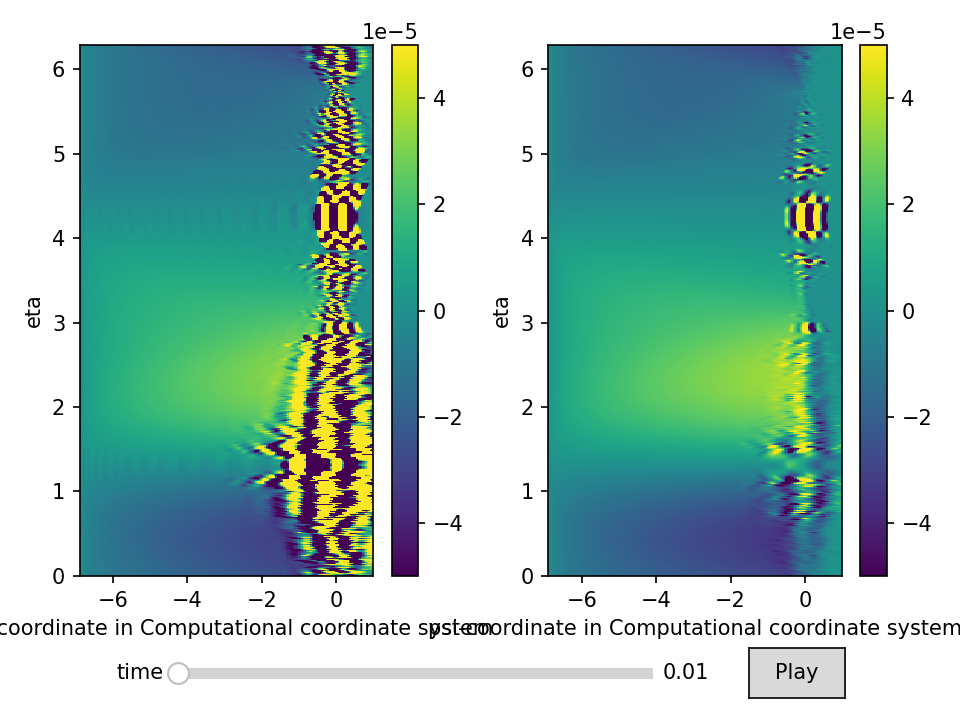

None data passed has 3 dimensions - will use animatplot.blocks.Pcolormesh()
None data passed has 3 dimensions - will use animatplot.blocks.Pcolormesh()


In [65]:
LHS=(ds["v_Omega_E_2dX"].differentiate("time")+ds["v_Omega_D_2dX"].differentiate("time"))/100
RHS=ds['v_J_par_tt_2dX']-ds['v_J_bperp_tt_2dX']+ds['v_J_D_tt_2dX']+ds['v_J_JAK_tt_2dX']+ds['v_J_NUK_tt_2dX']+ds['v_L_i_perp_tt_2dX']
_ = ds.feltor.animate_list(
    variables=[
        LHS.where(LHS.time>0.01),
        RHS.where(RHS.time>0.01),
    ], vmin=-5e-5, vmax=5e-5
)
plt.show()

<IPython.core.display.Javascript object>


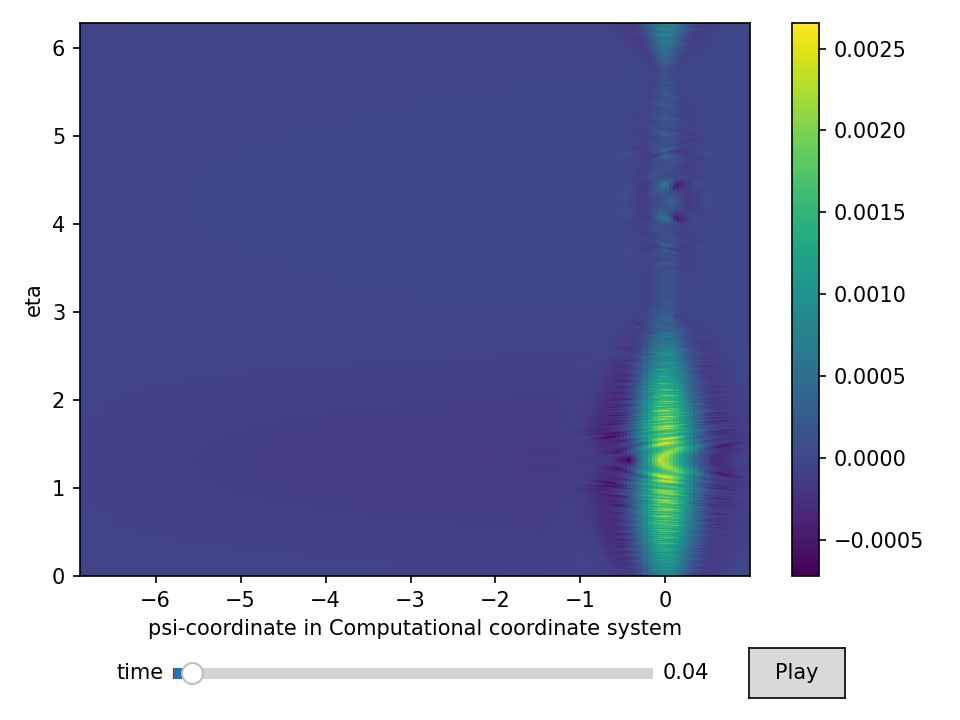

None data passed has 3 dimensions - will use animatplot.blocks.Pcolormesh()


In [66]:
Omega=(ds["v_Omega_E_2dX"]+ds["v_Omega_D_2dX"])/100
_ = ds.feltor.animate_list(
    variables=[
        Omega
    ]
)
plt.show()

<IPython.core.display.Javascript object>


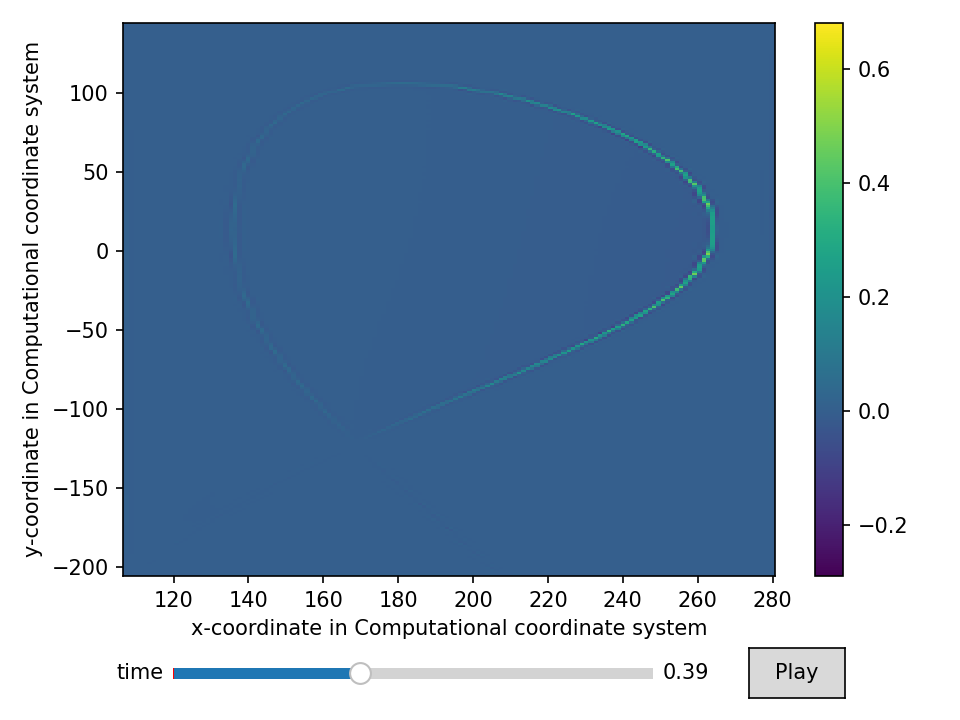

None data passed has 3 dimensions - will use animatplot.blocks.Pcolormesh()


In [60]:
d_Omega=ds["v_Omega_E_2d"]+ds["v_Omega_D_2d"]
_ = ds.feltor.animate_list(
    variables=[
        d_Omega.where(d_Omega.time>0.01)
    ]
)
plt.show()

In [21]:
LHS=ds["v_Omega_E_2dX"].differentiate("time")+ds["v_Omega_D_2dX"].differentiate("time")+ds["v_adv_E_tt_2dX"]+ds["v_adv_D_tt_2dX"]
RHS=ds['v_J_par_tt_2dX']-ds['v_J_bperp_tt_2dX']+ds['v_J_D_tt_2dX']+ds['v_J_JAK_tt_2dX']+ds['v_J_NUK_tt_2dX']+ds['v_L_i_perp_tt_2dX']

<IPython.core.display.Javascript object>


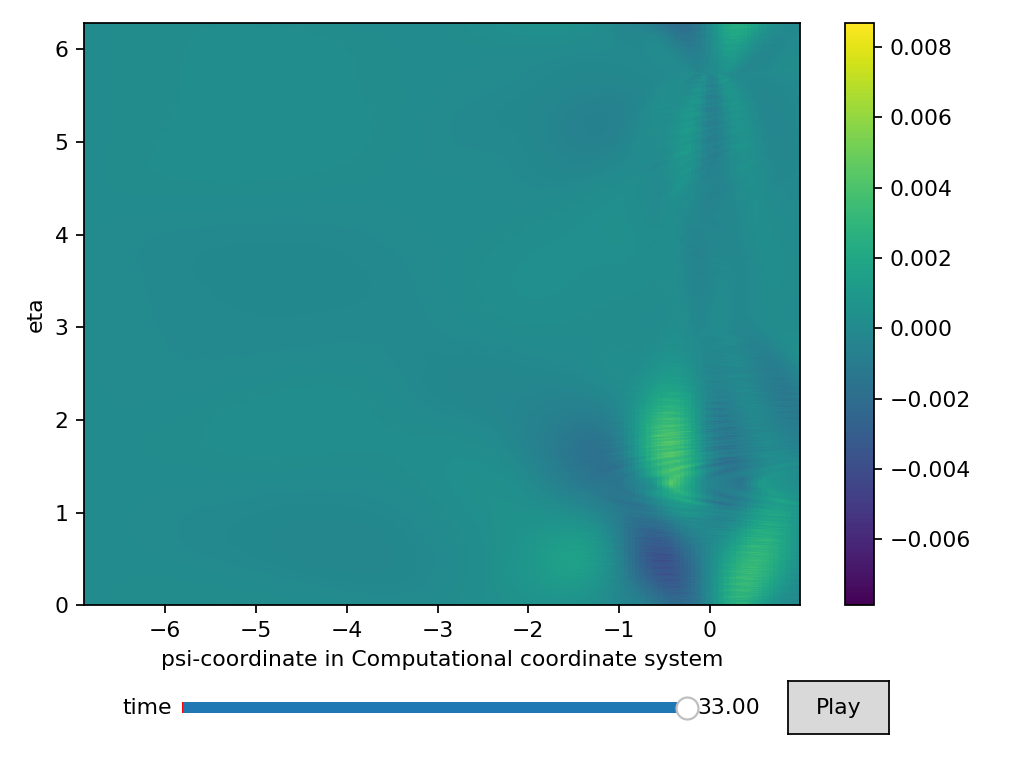

None data passed has 3 dimensions - will use animatplot.blocks.Pcolormesh()


In [156]:
_ = ds.feltor.animate_list(
    variables=[
        LHS-RHS,
    ]
)
plt.show()

<IPython.core.display.Javascript object>


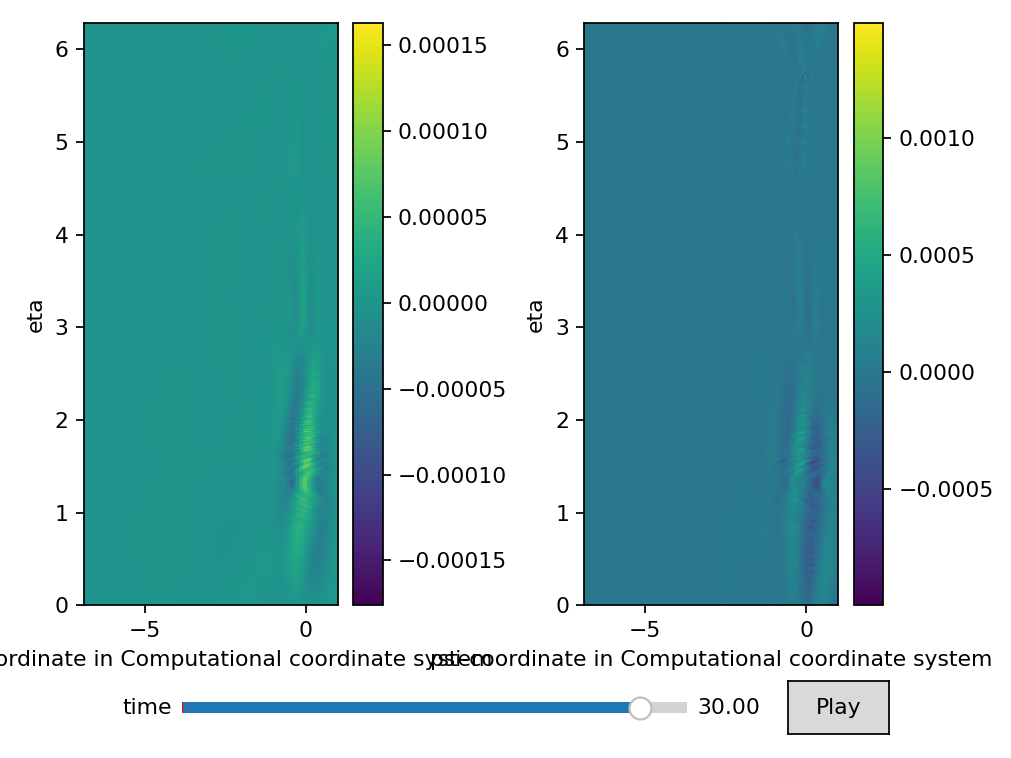

None data passed has 3 dimensions - will use animatplot.blocks.Pcolormesh()
None data passed has 3 dimensions - will use animatplot.blocks.Pcolormesh()


In [149]:
_ = ds.feltor.animate_list(
    variables=[
        -ds["v_adv_E_tt_2dX"]+ds["v_adv_E_gf_tt_2dX"],
        -ds["v_adv_D_tt_2dX"]+ds["v_adv_D_gf_tt_2dX"]
    ]
)
plt.show()

<IPython.core.display.Javascript object>


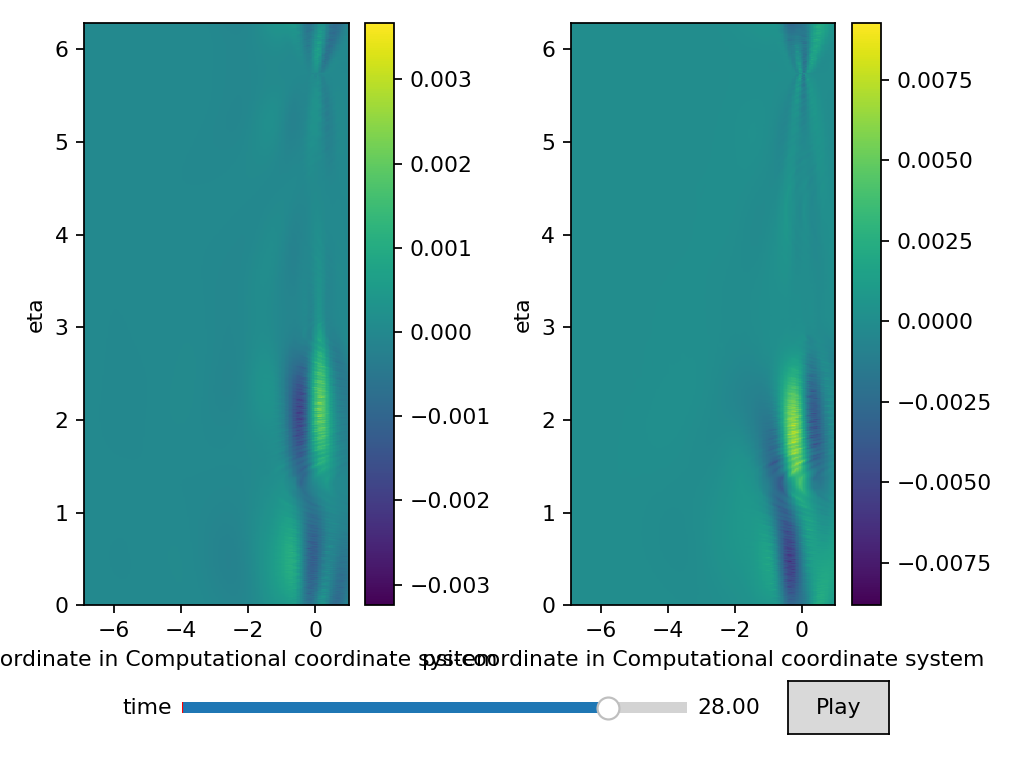

None data passed has 3 dimensions - will use animatplot.blocks.Pcolormesh()
None data passed has 3 dimensions - will use animatplot.blocks.Pcolormesh()


In [151]:
_ = ds.feltor.animate_list(
    variables=[
        ds["v_Omega_E_2dX"].differentiate("time")-ds["v_Omega_E_gf_2dX"].differentiate("time"),
        ds["v_Omega_D_2dX"].differentiate("time")-ds["v_Omega_D_gf_2dX"].differentiate("time")
    ]
)
plt.show()

In [28]:
LHS_gf=ds["v_Omega_E_gf_2dX"].differentiate("time")+ds["v_Omega_D_gf_2dX"].differentiate("time")+ds["v_adv_E_gf_tt_2dX"]+ds["v_adv_D_gf_tt_2dX"]
RHS_gf=ds['v_J_par_tt_2dX']-ds['v_J_bperp_tt_2dX']+ds['v_J_D_gf_tt_2dX']+ds['v_J_JAK_gf_tt_2dX']+ds['v_J_NUK_gf_tt_2dX']+ds['v_L_i_perp_tt_2dX']

<IPython.core.display.Javascript object>


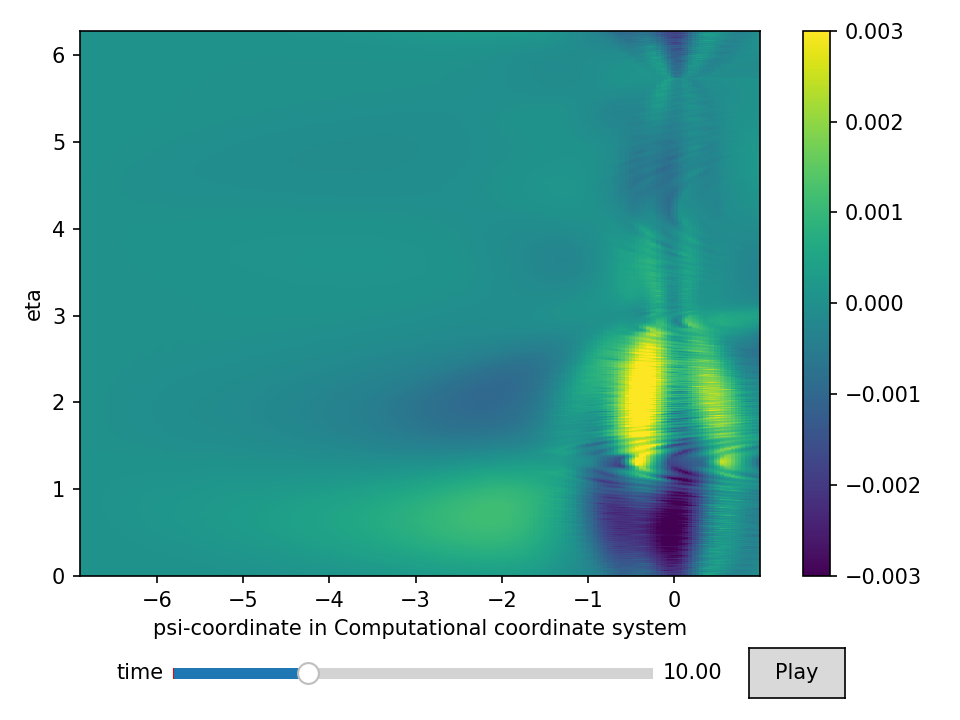

None data passed has 3 dimensions - will use animatplot.blocks.Pcolormesh()


In [16]:
_ = ds.feltor.animate_list(
    variables=[
        LHS_gf-RHS_gf
    ], vmin=-0.003, vmax=0.003
)
plt.show()

<IPython.core.display.Javascript object>


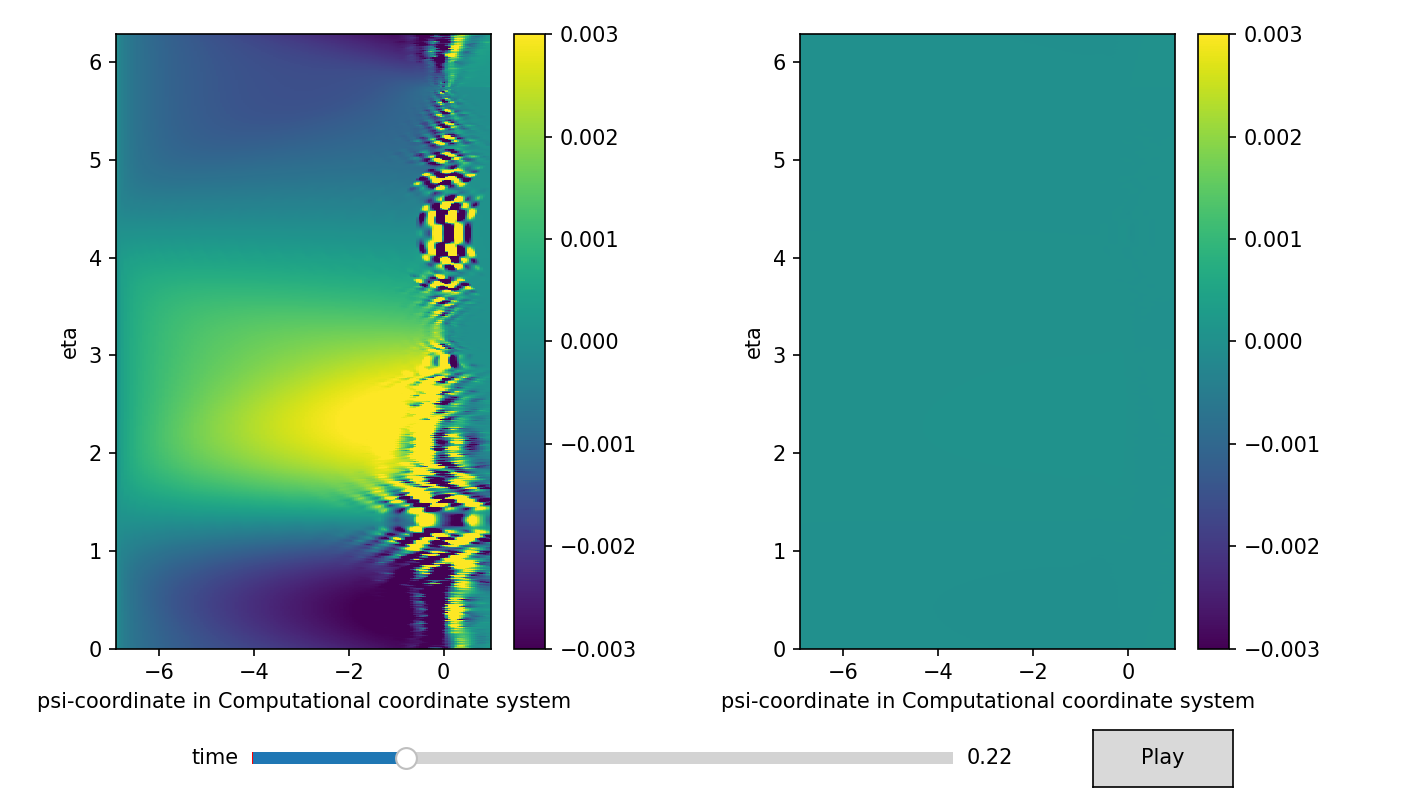

None data passed has 3 dimensions - will use animatplot.blocks.Pcolormesh()
None data passed has 3 dimensions - will use animatplot.blocks.Pcolormesh()


In [29]:
_ = ds.feltor.animate_list(
    variables=[
        LHS_gf,
        RHS_gf,
    ], vmin=-0.003, vmax=0.003
)
plt.show()

<IPython.core.display.Javascript object>


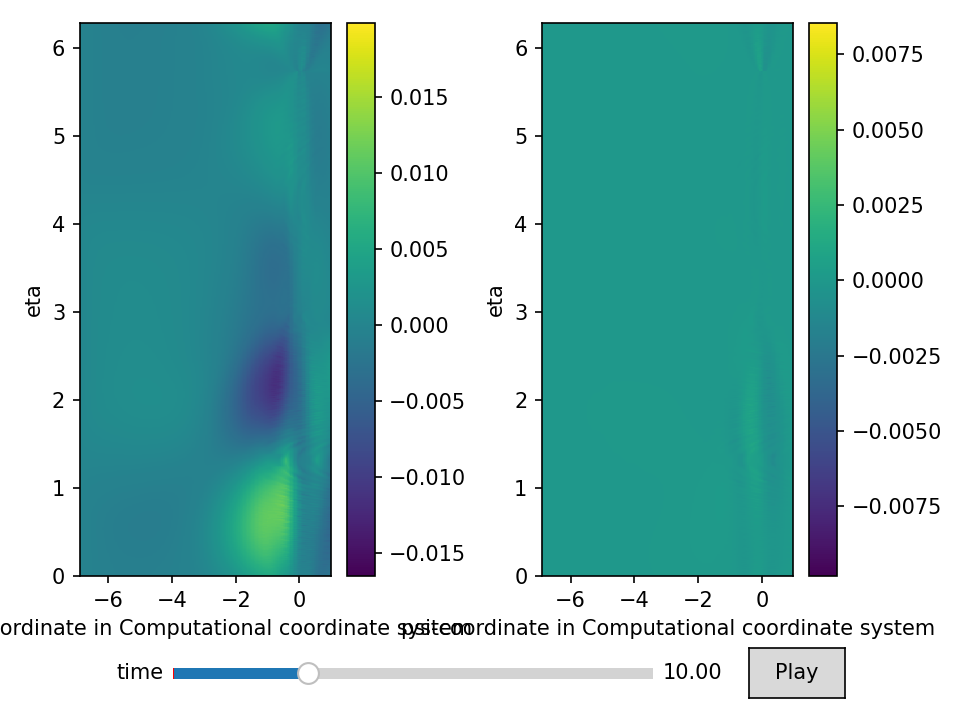

None data passed has 3 dimensions - will use animatplot.blocks.Pcolormesh()
None data passed has 3 dimensions - will use animatplot.blocks.Pcolormesh()


In [17]:
_ = ds.feltor.animate_list(
    variables=[
        ds["v_Omega_E_gf_2dX"].differentiate("time")+
        ds["v_Omega_D_gf_2dX"].differentiate("time"),#.isel(y=100),
        ds["v_adv_E_gf_tt_2dX"]+
        ds["v_adv_D_gf_tt_2dX"],#.isel(y=100),
    ]
)
plt.show()

<IPython.core.display.Javascript object>


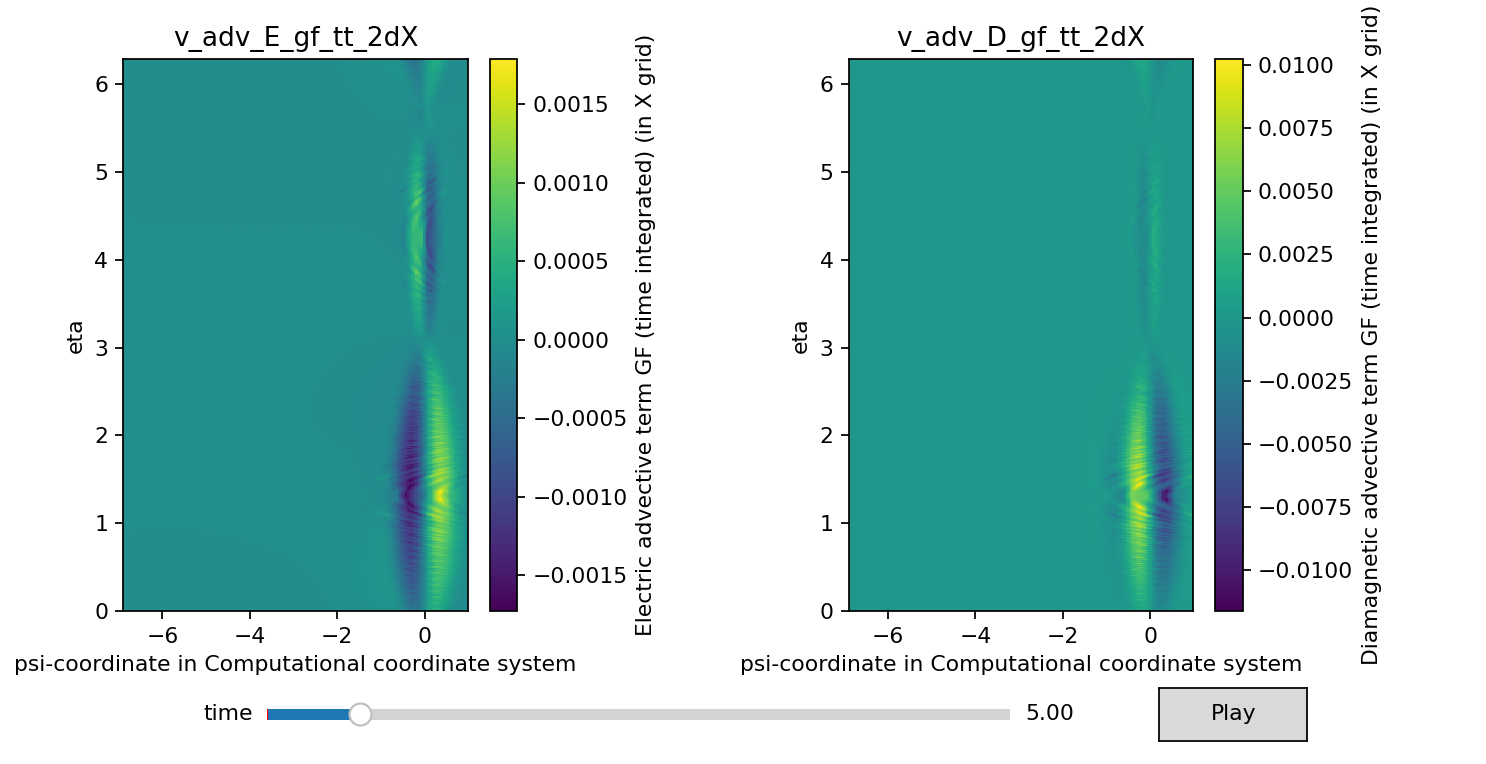

v_adv_E_gf_tt_2dX data passed has 3 dimensions - will use animatplot.blocks.Pcolormesh()
v_adv_D_gf_tt_2dX data passed has 3 dimensions - will use animatplot.blocks.Pcolormesh()


In [5]:
_ = ds.feltor.animate_list(
    variables=[
        ds["v_adv_E_gf_tt_2dX"],
        ds["v_adv_D_gf_tt_2dX"],#.isel(y=100),
    ]
)
plt.show()

In [18]:
LHS=ds["v_Omega_E_cta2d"].differentiate("time")+ds["v_Omega_D_cta2d"].differentiate("time")+ds["v_adv_E_tt_cta2d"]+ds["v_adv_D_tt_cta2d"]
RHS=ds['v_J_par_tt_cta2d']-ds['v_J_bperp_tt_cta2d']+ds['v_J_D_tt_cta2d']+ds['v_J_JAK_tt_cta2d']+ds['v_J_NUK_tt_cta2d']+ds['v_L_i_perp_tt_cta2d']

<IPython.core.display.Javascript object>


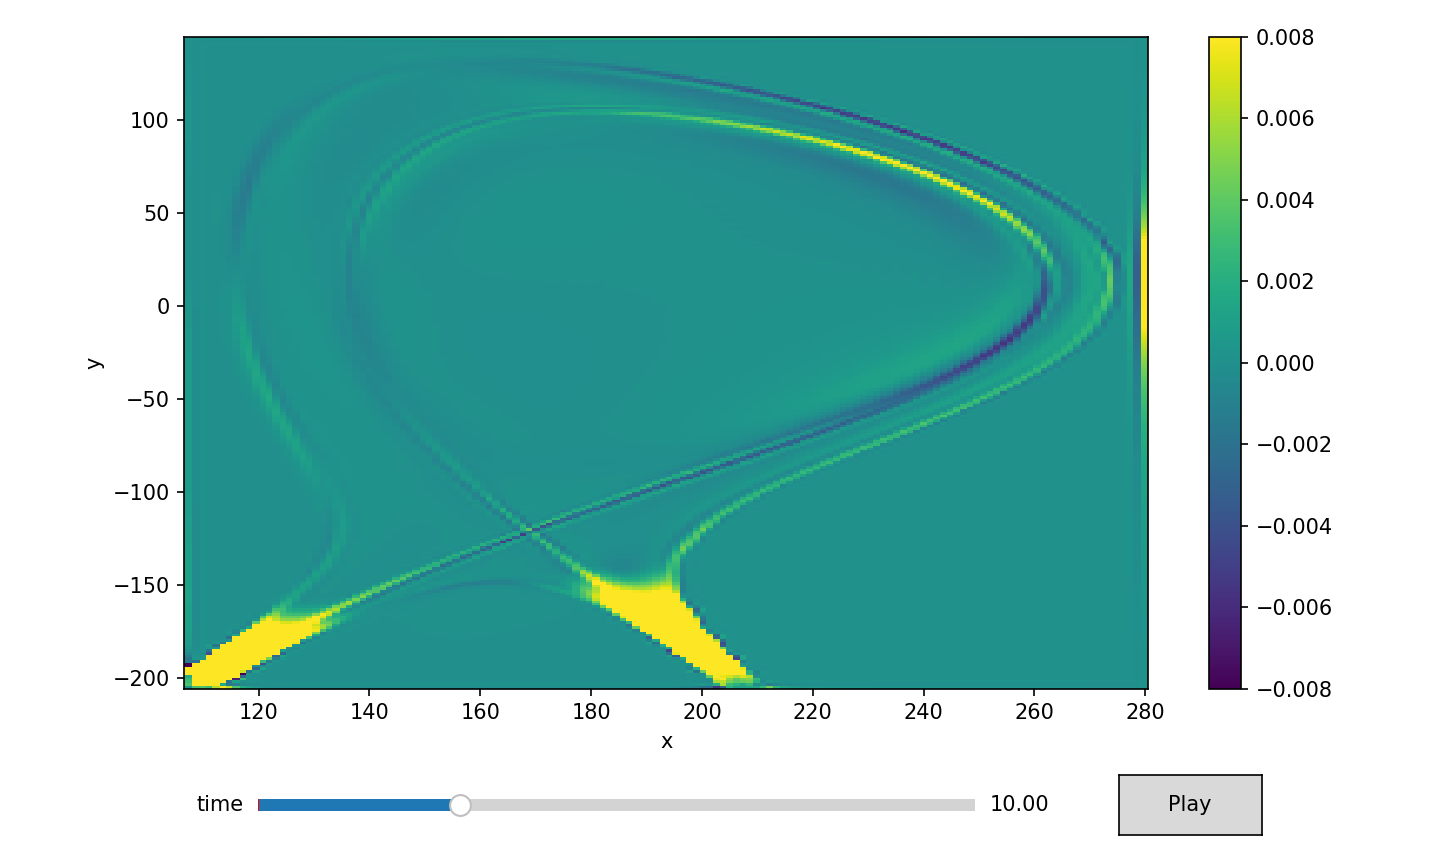

None data passed has 3 dimensions - will use animatplot.blocks.Pcolormesh()


In [19]:
_ = ds.feltor.animate_list(
    variables=[
        LHS-RHS,
    ], vmin =-0.008, vmax=0.008
)
plt.show()

<IPython.core.display.Javascript object>


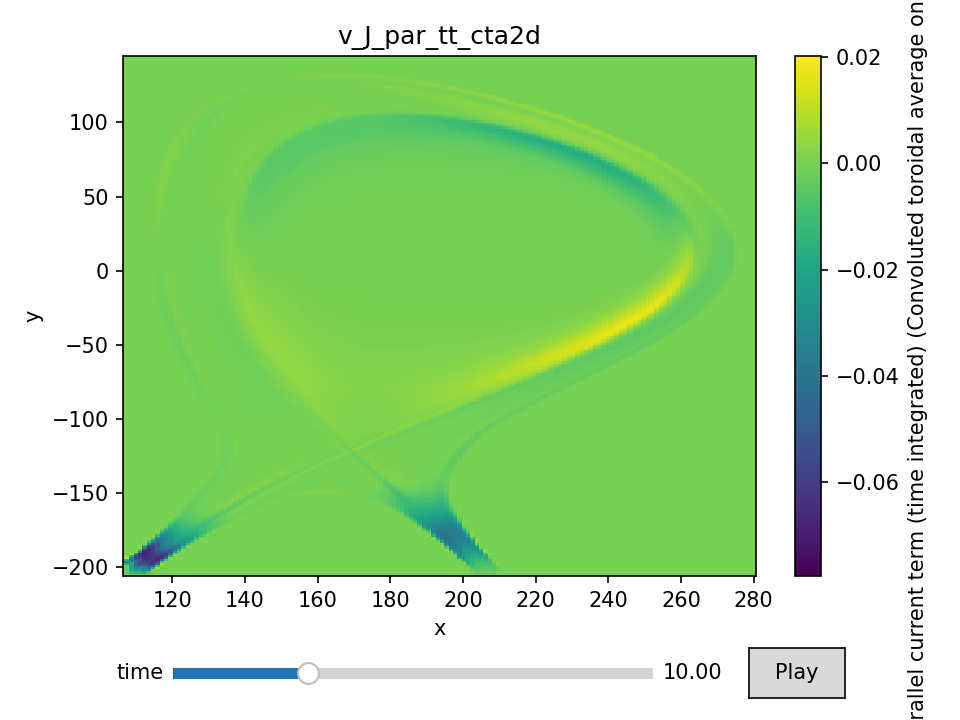

v_J_par_tt_cta2d data passed has 3 dimensions - will use animatplot.blocks.Pcolormesh()


In [20]:
_ = ds.feltor.animate_list(
    variables=[
        ds['v_J_par_tt_cta2d']
    ], 
)
plt.show()